In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
reviews_df = pd.read_csv("https://huggingface.co/datasets/Tatyana/ru_sentiment_dataset/resolve/main/datasets.csv")

In [ ]:
reviews_df['pre_process'] = reviews_df['text'].str.replace(r'[^\w\s]+', ' ')

reviews_df['pre_process'] = reviews_df['pre_process'].apply(
    lambda x: " ".join(x.lower() for x in str(x).split()))

stop = stopwords.words("russian")

reviews_df['pre_process'] = reviews_df['pre_process'].apply(
    lambda x: " ".join([x for x in x.split() if x not in stop]))

lemmatizer = WordNetLemmatizer()
reviews_df['pre_process'] = reviews_df['pre_process'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    reviews_df['pre_process'], reviews_df['sentiment'], test_size=0.25, random_state=30)

In [ ]:
vectorizer = TfidfVectorizer()

tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [ ]:
clf = LogisticRegression(max_iter=1000, solver='saga')

clf.fit(tf_x_train, Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
Y_predicted = clf.predict(tf_x_test)

In [ ]:
clf.score(tf_x_test, Y_test)

0.7631189808144384

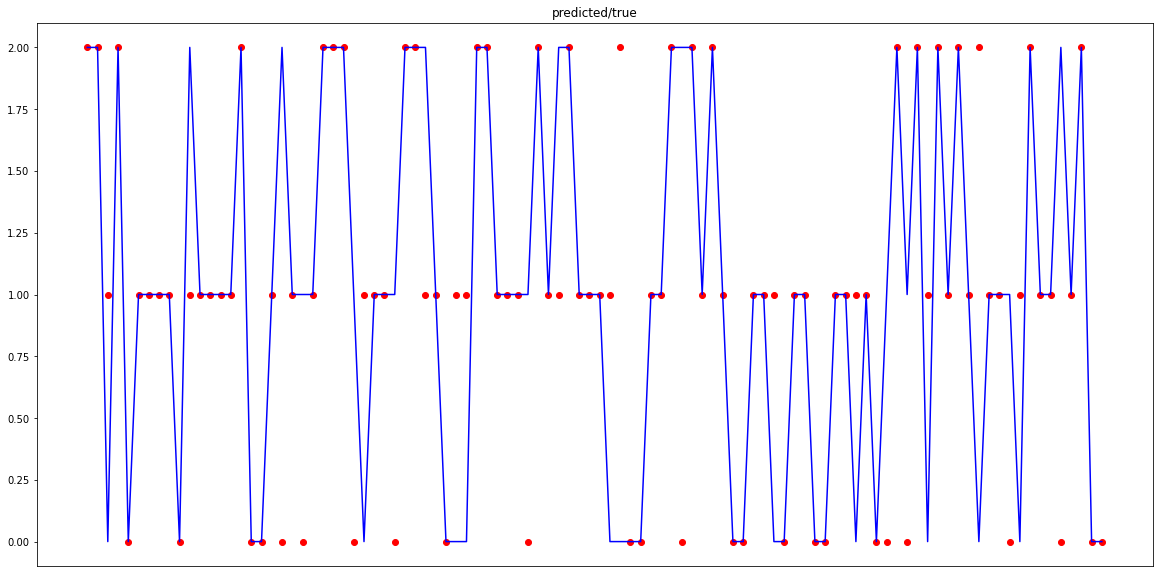

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(X_test[:100], Y_test[:100], color='blue')
plt.scatter(X_test[:100], Y_predicted[:100], color='red')
plt.title('predicted/true')
plt.xticks([])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, Y_predicted,output_dict=True)
report

{'0': {'f1-score': 0.6516698768034306,
  'precision': 0.6475516394626607,
  'recall': 0.6558408309560383,
  'support': 13671},
 '1': {'f1-score': 0.8084230156571741,
  'precision': 0.7968139695182661,
  'recall': 0.8203753351206434,
  'support': 25364},
 '2': {'f1-score': 0.7908380815818271,
  'precision': 0.8194401000938379,
  'recall': 0.7641653905053599,
  'support': 13713},
 'accuracy': 0.7631189808144384,
 'macro avg': {'f1-score': 0.7503103246808106,
  'precision': 0.7546019030249216,
  'recall': 0.7467938521940138,
  'support': 52748},
 'weighted avg': {'f1-score': 0.7632248211807056,
  'precision': 0.7640109592504385,
  'recall': 0.7631189808144384,
  'support': 52748}}